# Which version of the website should you use?

## 📖 Background
You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site. 

They have been testing the changes for a few weeks and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

## 💾 The data
The team assembled the following file:

#### Redesign test data
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

## 💪 Challenge
Complete the following tasks:

1. Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
2. Can the increases observed be explained by randomness? (Hint: Think A/B test)
3. Which version of the website should they use?

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file=pd.read_csv('data/redesign.csv')

In [3]:
file.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


In [4]:
file.isnull().sum()

treatment     0
new_images    0
converted     0
dtype: int64

**No null values**

In [5]:
file.shape

(40484, 3)

In [6]:
#Let's do the EDA

<AxesSubplot: xlabel='new_images', ylabel='count'>

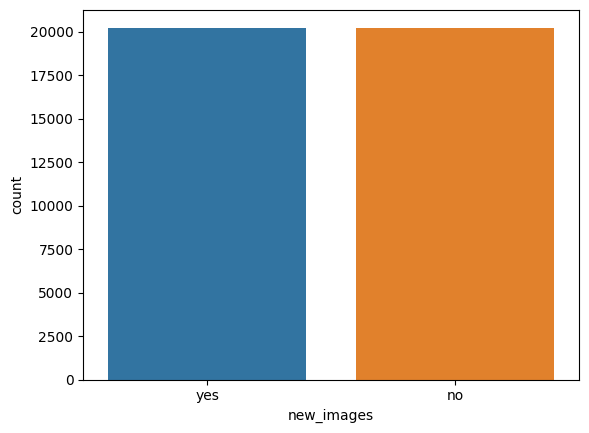

In [7]:
sns.countplot(data=file, x='new_images')

**An equal number of people were shown both old and new images.**

<AxesSubplot: xlabel='treatment', ylabel='count'>

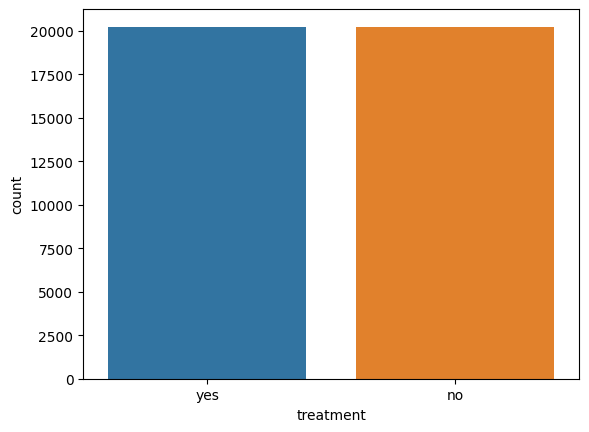

In [8]:
sns.countplot(data=file, x='treatment')

**"An equal number of people were shown the website with and without treatment."**

<AxesSubplot: xlabel='converted', ylabel='count'>

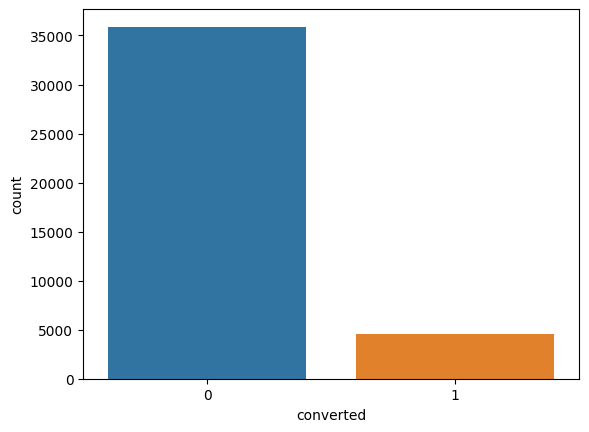

In [9]:
sns.countplot(data=file, x='converted')

**From the above chart it is clearly visible that we have a very low no. of conversion so it is very much possible that conversion after change in website is merely due to chance or randomness.**

In [10]:
file.dtypes

treatment     object
new_images    object
converted      int64
dtype: object

**Since our variables 'new_image' and 'treatment' are in categorical form so we will convert our data in numeric form using encoding.** 

In [11]:
file['treatment_encoded'] = file['treatment'].replace({'no': 0, 'yes': 1})

In [12]:
file['image_encoded'] = file['new_images'].replace({'no': 0, 'yes': 1})

In [13]:
file.drop(columns=['treatment','new_images'],inplace=True)

In [14]:
file.head()

,converted,treatment_encoded,image_encoded
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,0
4,0,0,1


In [15]:
file[['treatment_encoded','converted']].corr()

,treatment_encoded,converted
treatment_encoded,1.000000,0.011142
converted,0.011142,1.000000


In [16]:
file[['image_encoded','converted']].corr()

,image_encoded,converted
image_encoded,1.000000,-0.000701
converted,-0.000701,1.000000


**From correlation analysis we can see that change in treatment or image does'nt have much effect on conversion i.e. not correlated**

**We want to perform Chi-Square test so let's make contingency table.**

In [17]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(file['treatment_encoded'] & file['image_encoded'], file['converted'])
contingency_table

converted,0,1
row_0,,
0,26925,3438
1,8970,1151


# **Chi- Square Test**
**Null hypothesis H0:- changing the image or treatment variable has no effect on the conversion rate.**

**Alternate Hypothesis H1:-changing the image or treatment variable does have an effect on the conversion rate.**

In [18]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print the chi-square test results
print('Chi-square test results:')
print(f'Chi-square test statistic = {chi2:.2f}')
print(f'P-value = {p:.2f}')
print(f'Degrees of freedom = {dof}')
print(f'Expected values:\n{expected}')

Chi-square test results:
Chi-square test statistic = 0.01
P-value = 0.91
Degrees of freedom = 1
Expected values:
[[26921.25  3441.75]
 [ 8973.75  1147.25]]


## **P-value > Significance value**

**This means that we don't have enough evidence to reject null hypothsis so we accept the null hypothesis and conclude that conversions are merely due to randomnes.**

# **T-test**
**Null Hypothsis H0:-the conversion rate of the two groups (e.g., with and without the treatment and image) is the same.**

**Alternate Hypothesis H1:-the conversion rate of the two groups is different.**

In [19]:
import scipy.stats as stats
# split the dataframe into two groups based on the image variable
group1 = file.loc[file['image_encoded'] == 0, 'converted']
group2 = file.loc[file['image_encoded'] == 1, 'converted']

# perform the two-sample t-test assuming unequal variances
t, p = stats.ttest_ind(group1, group2, equal_var=False)

# print the t-test results
print('Two-sample t-test results for image:')
print(f'T-test statistic = {t:.2f}')
print(f'P-value = {p:.3f}')

# split the dataframe into two groups based on the treatment variable
group1 = file.loc[file['treatment_encoded'] == 0, 'converted']
group2 = file.loc[file['treatment_encoded'] == 1, 'converted']
# perform the two-sample t-test assuming unequal variances
t, p = stats.ttest_ind(group1, group2, equal_var=False)

# print the t-test results
print('Two-sample t-test results for treatment:')
print(f'T-test statistic = {t:.2f}')
print("The significance value is 0.01")
print(f'P-value = {p:.3f}')

Two-sample t-test results for image:
T-test statistic = 0.14
P-value = 0.888
Two-sample t-test results for treatment:
T-test statistic = -2.24
The significance value is 0.01
P-value = 0.025


## **P-value > Significance value**

**This means that we don't have enough evidence to reject null hypothsis so we accept the null hypothesis and conclude that conversions are merely due to randomnes.**